In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = pd.read_excel(r'C:\Users\arcue\Desktop\data-ex-2-9_(Delivery_Time).xls')
#可以對老師給的Excel按右鍵，複製路徑，就找到這串

In [3]:
x = x.rename(columns={'Delivery Time, y': 'Y', 'Number of Cases, x': 'X'}) #轉換欄位名稱(只是為了方便後面不用打很長的欄位名稱)

In [4]:
xbar = x['X'].mean() #計算平均值
ybar = x['Y'].mean()

In [5]:
x['xxbar']=x['X']-xbar #新增x-xbar欄位，並且直接用X欄位做計算後帶入，計算x-xbar

In [6]:
x['yybar']=x['Y']-ybar #同x做法

In [7]:
x['xxbar_square'] = x['xxbar'] ** 2

In [8]:
x['xxbar_yybar'] = x['xxbar'] * x['yybar']

In [9]:
b1 = x['xxbar_yybar'].mean()/x['xxbar_square'].mean()  #xxbar_yybar的總和 / xxbar_square的總和

In [10]:
b0 = ybar - b1 * xbar    # ybar-b1*xbar

In [11]:
y_hat = b0 + b1*x['X'] #寫出方程式以帶入圖形

b0= 3.3207798972337628 b1= 2.1761666783979723


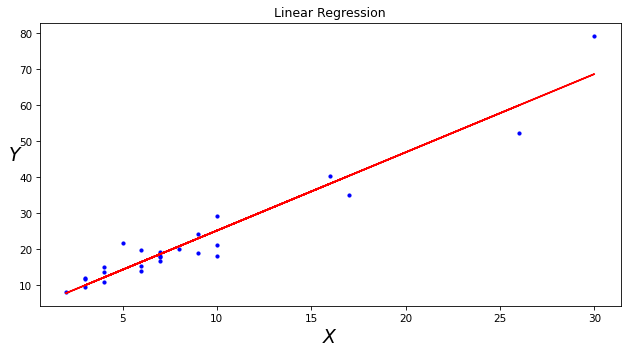

In [12]:
plt.figure( figsize=(10,5), dpi=75)
plt.plot(x['X'], x['Y'], 'b.') #畫出x和y的分佈
plt.plot(x['X'], y_hat, 'r-') #畫出方程式的線
plt.xlabel("$X$", fontsize = 18)
plt.ylabel("$Y$", rotation = 0, fontsize = 18)
plt.title('Linear Regression')
print("b0=",b0,"b1=",b1)
plt.savefig('迴歸分析作業圖.jpg')

In [13]:
import seaborn as sns

Text(0.5, 1.0, 'Linear Regression')

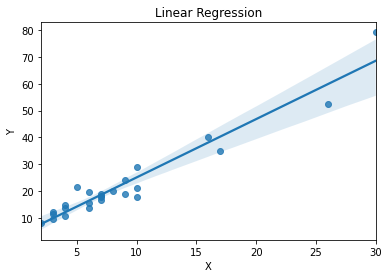

In [14]:
ax = sns.regplot(data=x, x='X', y='Y') #直接用回歸的函數來畫，超級快
ax.set_title('Linear Regression')

In [39]:
#HW2: finish the estimation table
#y_hat = b0 + b1*x

x['y_hat'] = b0 + b1*x['X']
x['e'] = x['Y']-x['y_hat'] #計算殘差
x['ee'] = x['e']**2        #計算殘差平方
ss = sum(x['ee'])/(len(x['X'])-2)   #自由度n-2
#自由度是來自項目數減去有幾個條件限制，未來如果項目數多的話，因此用len來計算項目數
s = ss**0.5               #計算T檢定的標準差

In [45]:
b0se = s * (1/len(x['X']) + xbar**2 / sum(x['xxbar'])) ** 0.5
b1se = s * sum(x['xxbar_square']) ** 0.5
b0T = b0/b0se
b1T = b1/b1se

In [1]:
#要計算p-value需要用到 scipy這個套件，可以import各種所需要的檢定，這邊先以T檢定為主
from scipy.stats import t
b0p = (1-t.cdf(abs(b0T),len(x['X'])))*2
b1p = (1-t.cdf(abs(b1T),len(x['X'])))*2

NameError: name 'b0T' is not defined

In [65]:
b0lower_limit = b0 - t.ppf(0.975,len(x['X'])-2)*b0se
b0upper_limit = b0 + t.ppf(0.975,len(x['X'])-2)*b0se 
b1lower_limit = b1 - t.ppf(0.975,len(x['X'])-2)*b1se
b1upper_limit = b1 + t.ppf(0.975,len(x['X'])-2)*b1se


In [66]:
#利用dataframe建立成一個表格，比較美觀
EsTb = {
    "Parameter" : ['Beta0' , 'Beta1'],
    "Estimate" : [b0, b1],
    "Standard Error" : [b0se, b1se],
    "T" : [b0T, b1T],
    "p-value" : [b0p, b1p],
    "95%_Lo_Lim" : [b0lower_limit, b1lower_limit],
    "95%_Up_Lim" : [b0upper_limit, b1upper_limit]
}

df = pd.DataFrame(EsTb)

print("Estimation Table")
line = "-" *100 #放一個分隔線，比較容易閱讀
print(line)
print(df)

#存檔
df.to_csv("RegressionHW2",encoding="utf_8_sig")

Estimation Table
----------------------------------------------------------------------------------------------------
  Parameter  Estimate  Standard Error             T   p-value    95%_Lo_Lim  \
0     Beta0  3.320780    2.896937e+08  1.146307e-08  1.000000 -5.992772e+08   
1     Beta1  2.176167    1.409670e+02  1.543742e-02  0.987806 -2.894364e+02   

     95%_Up_Lim  
0  5.992772e+08  
1  2.937887e+02  
